In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# ------------------------------
# 1. Chargement et Préparation des Données CIFAR-10
# ------------------------------
(x_train, _), (x_test, _) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# ------------------------------
# 1.1 Vérification et Filtrage des Données
# ------------------------------
def check_and_filter_data(data):
    """Vérifie et filtre les données pour les valeurs None et les images invalides."""
    filtered_data = []
    for img in data:
        if img is not None and img.size > 0 and not np.isnan(img).any():
            filtered_data.append(img)
        else:
            print("Image invalide détectée et filtrée.")
    return np.array(filtered_data)

x_train = check_and_filter_data(x_train)
x_test = check_and_filter_data(x_test)

if len(x_train) == 0 or len(x_test) == 0:
    raise ValueError("Après le filtrage, les données d'entraînement ou de test sont vides. Vérifiez vos données.")

# Data Augmentation (après le filtrage)
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True
)

# Ajout de labels identiques pour l'autoencodeur

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, x_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(256).prefetch(tf.data.AUTOTUNE)

val_dataset = tf.data.Dataset.from_tensor_slices((x_test, x_test))
val_dataset = val_dataset.batch(256).prefetch(tf.data.AUTOTUNE)

print("Shape des données d'entraînement :", x_train.shape)
print("Shape des données de test :", x_test.shape)

input_shape = (32, 32, 3)
latent_dim = 256

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 20s 0us/step
Shape des données d'entraînement : (50000, 32, 32, 3)
Shape des données de test : (10000, 32, 32, 3)


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, 256)                 │         618,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 32, 32, 3)           │         767,939 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,386,627 (5.29 MB)

 Trainable params: 1,385,731 (5.29 MB)

 Non-trainable params: 896 (3.50 KB)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


TensorFlow version: 2.17.1
GPU is available
Devices: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Epoch 1/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 47s 114ms/step - loss: 8.8412 - val_loss: 11.1016 - learning_rate: 0.0010
Epoch 2/100
  1/195 ━━━━━━━━━━━━━━━━━━━━ 25:24 8s/step - loss: 5.1850

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


195/195 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 5.1850 - val_loss: 11.0515 - learning_rate: 0.0010
Epoch 3/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 53s 99ms/step - loss: 4.8968 - val_loss: 6.4199 - learning_rate: 0.0010
Epoch 4/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 4.2813 - val_loss: 6.5106 - learning_rate: 0.0010
Epoch 5/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 20s 105ms/step - loss: 4.0810 - val_loss: 3.8503 - learning_rate: 0.0010
Epoch 6/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 3.5808 - val_loss: 3.8534 - learning_rate: 0.0010
Epoch 7/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 20s 101ms/step - loss: 3.5199 - val_loss: 3.4478 - learning_rate: 0.0010
Epoch 8/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 2.8804 - val_loss: 3.5129 - learning_rate: 0.0010
Epoch 9/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 39s 103ms/step - loss: 3.0693 - val_loss: 3.0855 - learning_rate: 0.0010
Epoch 10/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 2.7297 - val_loss: 3.1295 - learning_rate: 0.00

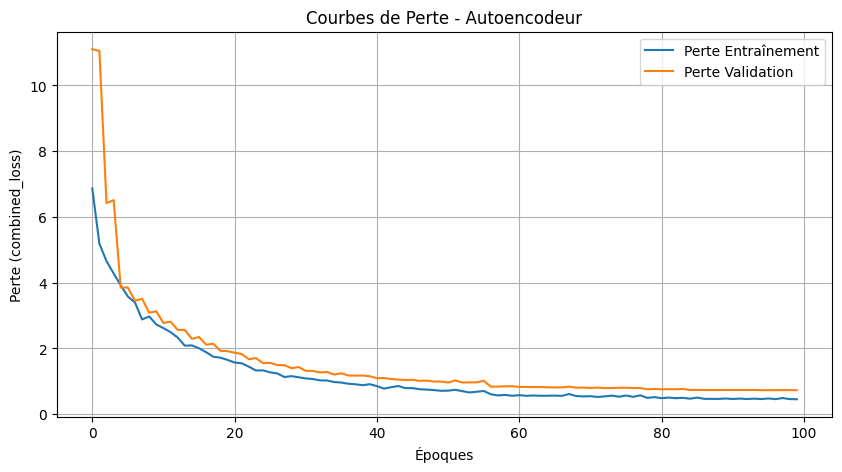

In [3]:
# ------------------------------
# 2. Définition de l'Encodeur
# ------------------------------
def create_encoder(input_shape=(32, 32, 3), latent_dim=32):
    model = models.Sequential([
        layers.Input(shape=input_shape),
        layers.Conv2D(32, (3, 3), activation='relu', strides=2, padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', strides=2, padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu', strides=2, padding='same'),
        layers.BatchNormalization(),
        layers.Flatten(),
        layers.Dense(latent_dim, activation='tanh')
    ])
    return model

# ------------------------------
# 3. Définition du Décodeur
# ------------------------------
def create_decoder(latent_dim=128, output_shape=(32, 32, 3)):
    model = models.Sequential([
        layers.Input(shape=(latent_dim,)),
        layers.Dense(4 * 4 * 128, activation='relu'),
        layers.Reshape((4, 4, 128)),
        layers.Conv2DTranspose(128, (3, 3), strides=2, padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2DTranspose(64, (3, 3), strides=2, padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2DTranspose(32, (3, 3), strides=2, padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2DTranspose(3, (3, 3), activation='sigmoid', padding='same')
    ])
    return model

encoder = create_encoder(input_shape=input_shape, latent_dim=latent_dim)
decoder = create_decoder(latent_dim=latent_dim, output_shape=input_shape)

# Construire l'autoencodeur
autoencoder_input = tf.keras.Input(shape=input_shape)
encoded = encoder(autoencoder_input)
decoded = decoder(encoded)
autoencoder = tf.keras.Model(inputs=autoencoder_input, outputs=decoded)

autoencoder.summary()

# ------------------------------
# 5. Compilation de l'Autoencodeur
# ------------------------------

# Charger le modèle VGG16 pré-entraîné
vgg = tf.keras.applications.VGG16(include_top=False, weights='imagenet', input_shape=(32, 32, 3))
vgg.trainable = False

# Créer un extracteur de caractéristiques basé sur VGG16
def create_feature_extractor(vgg_model, layer_index=-5):
    """Crée un modèle pour extraire des caractéristiques d'une couche donnée de VGG16."""
    return tf.keras.Model(inputs=vgg_model.input, outputs=vgg_model.layers[layer_index].output)

feature_extractor = create_feature_extractor(vgg, layer_index=-5)

# Définir la perte perceptuelle
@tf.function
def perceptual_loss(y_true, y_pred):
    """Calcule la perte perceptuelle entre les vraies images et les prédictions."""
    true_features = feature_extractor(y_true)
    pred_features = feature_extractor(y_pred)
    return tf.reduce_mean(tf.square(true_features - pred_features))

# Définir une perte combinée (perceptuelle + MSE)
@tf.function
def combined_loss(y_true, y_pred):
    """Combine la perte perceptuelle et la perte MSE."""
    perceptual = perceptual_loss(y_true, y_pred)
    mse = tf.reduce_mean(tf.square(y_true - y_pred))
    return perceptual + 45 * mse

# Compiler l'autoencodeur avec la perte combinée
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=combined_loss)

# ------------------------------
# 6. Entraînement de l'Autoencodeur
# ------------------------------
callbacks_autoencoder = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint('best_autoencoder.keras', save_best_only=True, monitor='val_loss'),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)
]

print("TensorFlow version:", tf.__version__)
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")
print("Devices:", tf.config.list_physical_devices('GPU'))

with tf.device('/GPU:0'):
    history_autoencoder = autoencoder.fit(
        train_dataset,
        steps_per_epoch=max(len(x_train) // 256, 1),
        validation_data=val_dataset,
        epochs=100,
        callbacks=callbacks_autoencoder
    )

# Afficher les courbes d'entraînement
plt.figure(figsize=(10, 5))
plt.plot(history_autoencoder.history['loss'], label='Perte Entraînement')
plt.plot(history_autoencoder.history['val_loss'], label='Perte Validation')
plt.title('Courbes de Perte - Autoencodeur')
plt.xlabel('Époques')
plt.ylabel('Perte (combined_loss)')
plt.legend()
plt.grid()
plt.show()

# Sauvegarde de l'encodeur et du décodeur séparément
encoder.save('encoder.keras')
decoder.save('decoder.keras')

# Chargement des modèles sauvegardés
encoder = tf.keras.models.load_model('encoder.keras')
decoder = tf.keras.models.load_model('decoder.keras')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Taille originale : 61440 octets
Taille après compression : 5120 octets
Ratio de compression : 12.00


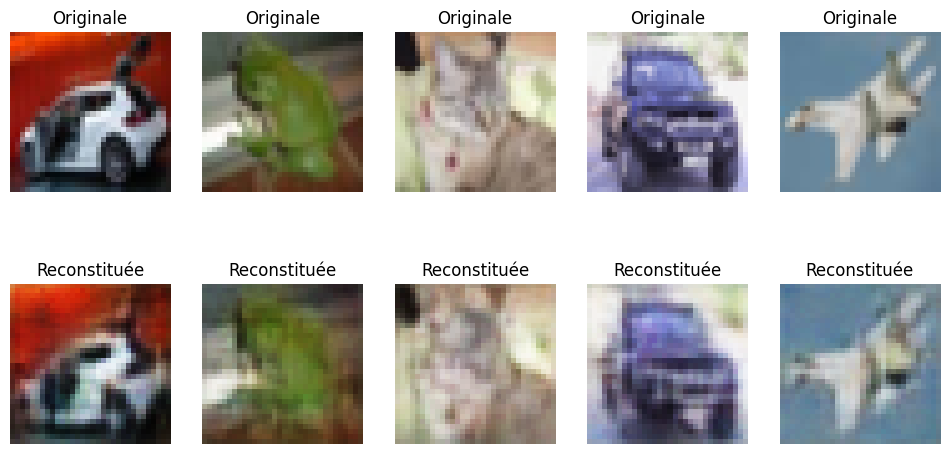

In [9]:
# ------------------------------
# 9. Test et Comparatif de Compression
# ------------------------------
sample_images = x_test[6:11]
with tf.device('/GPU:0'):
    latent_representations = encoder.predict(sample_images)
    reconstructed_images = decoder.predict(latent_representations)

# Comparer les tailles en octets avant et après compression
original_size = sample_images.size * sample_images.itemsize
compressed_size = latent_representations.size * latent_representations.itemsize

print(f"Taille originale : {original_size} octets")
print(f"Taille après compression : {compressed_size} octets")
compression_ratio = original_size / compressed_size
print(f"Ratio de compression : {compression_ratio:.2f}")

# Comparer les images originales et reconstruites
plt.figure(figsize=(12, 6))
for i in range(len(sample_images)):
    plt.subplot(2, 5, i + 1)
    plt.imshow(sample_images[i])
    plt.title("Originale")
    plt.axis('off')

    plt.subplot(2, 5, i + 6)
    plt.imshow(reconstructed_images[i])
    plt.title("Reconstituée")
    plt.axis('off')
plt.show()